![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sarcasam_classifier_demo_news_headlines.ipynb)


# Training a Sentiment Analysis Classifier with NLU
## 2 Class  News Headlines Sarcasam Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>

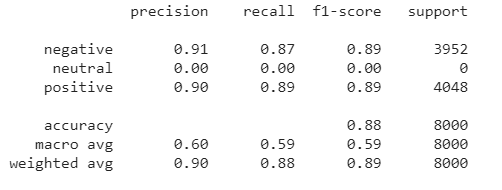

You can achieve these results or even better on this dataset with test  data:


<br>

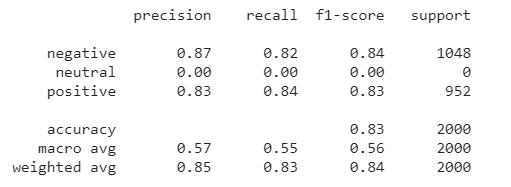





# 1. Colab Setup

In [ ]:
! pip install -q johnsnowlabs

# 2. Download News Headlines Sarcsam dataset
https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
#Context
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.


In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/Sarcasm_Headlines/Sarcasm_Headlines_Dataset_v2.csv


In [3]:
import pandas as pd
test_path = '/content/Sarcasm_Headlines_Dataset_v2.csv'
train_df = pd.read_csv(test_path,sep=",")
cols = ["y","text"]
train_df = train_df[cols]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df



,y,text
1875,negative,this t. rex dominates 'american ninja warrior'...
11997,negative,computer science in vietnam: counting down to ...
315,positive,dhs announces racial profiling free-for-all th...
16252,negative,the best rent the runway dresses for bridesmaids
12178,negative,abe's visit will remind americans china's powe...
...,...,...
10908,positive,sudden death of aunt creates rupture in family...
17451,negative,over 50% of lgbtq youths struggle with eating ...
16032,negative,gop senator: my family went from 'cotton to co...
17823,negative,martin o'malley fails to make ohio's president...


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)

print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        22
    positive       0.56      1.00      0.72        28

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,kids in bus accident mocked by kids in passing...,"[-0.7924436926841736, -0.07141707092523575, -0...",positive,0.0,kids in bus accident mocked by kids in passing...,positive
1,these two words are stealing your freedom,"[-1.028885006904602, -0.7214630246162415, 0.12...",positive,0.0,these two words are stealing your freedom,negative
2,"bush vows to do 'that thing gore just said, on...","[-1.7108917236328125, 0.2942552864551544, -0.3...",positive,0.0,"bush vows to do 'that thing gore just said, on...",positive
3,scotland's parliament backs new independence r...,"[0.14012272655963898, 0.7012102603912354, -0.0...",positive,0.0,scotland's parliament backs new independence r...,negative
4,joe biden: being vice president is 'a bitch',"[-0.571045458316803, 0.5463784337043762, -0.17...",positive,0.0,joe biden: being vice president is 'a bitch',negative
5,u.s. army now just chasing single remaining is...,"[-0.9116203188896179, -0.3868906497955322, -0....",positive,0.0,u.s. army now just chasing single remaining is...,positive
6,sheryl crow's freshness date expires,"[-1.388686180114746, 0.5200713872909546, -0.43...",positive,0.0,sheryl crow's freshness date expires,positive
7,new ebola quarantine protocol seen as barrier ...,"[-0.6295406222343445, 0.43973761796951294, -0....",positive,0.0,new ebola quarantine protocol seen as barrier ...,negative
8,the secret to building a successful business t...,"[-0.1442088484764099, 0.5362765192985535, -0.5...",positive,0.0,the secret to building a successful business t...,negative
9,school for crime,"[-1.4345587491989136, 0.35326844453811646, -1....",positive,0.0,school for crime,negative


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('Aliens are immortal!')


sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,Aliens are immortal!,"[-0.6534902453422546, -1.4232430458068848, -0....",positive,0.989048


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.44      1.00      0.61        22
    positive       0.00      0.00      0.00        28

    accuracy                           0.44        50
   macro avg       0.22      0.50      0.31        50
weighted avg       0.19      0.44      0.27        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,kids in bus accident mocked by kids in passing...,"[-0.7924436926841736, -0.07141707092523575, -0...",negative,7.0,kids in bus accident mocked by kids in passing...,positive
1,these two words are stealing your freedom,"[-1.028885006904602, -0.7214630246162415, 0.12...",negative,1.0,these two words are stealing your freedom,negative
2,"bush vows to do 'that thing gore just said, on...","[-1.7108917236328125, 0.2942552864551544, -0.3...",negative,1.0,"bush vows to do 'that thing gore just said, on...",positive
3,scotland's parliament backs new independence r...,"[0.14012272655963898, 0.7012102603912354, -0.0...",negative,5.0,scotland's parliament backs new independence r...,negative
4,joe biden: being vice president is 'a bitch',"[-0.571045458316803, 0.5463784337043762, -0.17...",negative,2.0,joe biden: being vice president is 'a bitch',negative
5,u.s. army now just chasing single remaining is...,"[-0.9116203188896179, -0.3868906497955322, -0....",negative,1.0,u.s. army now just chasing single remaining is...,positive
6,sheryl crow's freshness date expires,"[-1.388686180114746, 0.5200713872909546, -0.43...",negative,1.0,sheryl crow's freshness date expires,positive
7,new ebola quarantine protocol seen as barrier ...,"[-0.6295406222343445, 0.43973761796951294, -0....",negative,1.0,new ebola quarantine protocol seen as barrier ...,negative
8,the secret to building a successful business t...,"[-0.1442088484764099, 0.5362765192985535, -0.5...",negative,4.0,the secret to building a successful business t...,negative
9,school for crime,"[-1.4345587491989136, 0.35326844453811646, -1....",negative,1.0,school for crime,negative


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [ ]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df[:1000])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df[:1000],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.92      0.86      0.89       542
     neutral       0.00      0.00      0.00         0
    positive       0.89      0.85      0.87       458

    accuracy                           0.86      1000
   macro avg       0.60      0.57      0.59      1000
weighted avg       0.91      0.86      0.88      1000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.76      0.79      0.78        53
     neutral       0.00      0.00      0.00         0
    positive       0.82      0.60      0.69        47

    accuracy                           0.70       100
   macro avg       0.53      0.46      0.49       100
weighted avg       0.79      0.70      0.74       100



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('Aliens are immortal!')

preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,Aliens are immortal!,"[0.3093056380748749, 0.1294729858636856, 0.065...",negative,0.0


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[